# LWA1 Commander Output Data

Maps -- Filenames


lwa1_80mhz_map -- "lwa1_80mhz_map.fits"
lwa1_80mhz_noisemap -- "lwa1_80mhz_noisemap.fits"
lwa1_80mhz_maskmap -- "lwa1_80mhz_maskmap.fits"
lwa1_80mhz_beamcls -- "lwa1_80mhz_beam.fits"



Need:

param file
default file defining details about map
job submission file

telescope details:


declination, resolution, scan strategy, mapmaking

LWA1 

Sky maps released by the LWA1 group are in HEALPix sky pixelization for equatorial coordinates with an approximate pixel size of 0.23 degrees and in equatorial Mollweide projection with an approximate pixel size of 0.3 degrees.

Sources of uncertainties/errors: (Lukas email)

- temperature scale error
- Confusion limit ---> do not include in rms map


10-NOV-22 Meeting 


FOR LWA1 noise:
    look at output chi2 from comm --> reduced chi2 should be close to 1 (not 0.001 or 1000)
    (data - signal model) / standard deviation



LATEST LWA1 run:
    num chains              = 1
    num gibbs iterations    = 200

    sample amplitude        = true
    sample spectral indices = true

    gain sampling           = false

    bands                   =   (1) haslam 
                                (2) 80lwa1
    
    comps                   =   (1) synch 
                                (2) md 
                                (3) ff

In [109]:
import glob
from cmath import nan

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib import ticker

from datetime import datetime
now = datetime.now()
# plt.rcParams['savefig.facecolor']='white'

from pathlib import Path
import h5py as h5

nchain = 1
totaliter = 2
beta = 3.1
isBeta = True

comp = "020406"
band = "005017"
op = "sample"
op = "optimize"
sampling="11"

date = now.strftime("%y%m%d")
filename = 'temp_{date}'.format(date=date)
file_list = glob.glob('*.*')

## Maps produced by Commander run

In [111]:
if isBeta:
    run_str = op+sampling+f"_beta{beta}_bd{band}_cp{comp}_c{nchain}_k{totaliter}"
else:
    run_str = op+sampling+f"_band{band}_comp{comp}_c{nchain}_k{totaliter}"
dir_comm = f"/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/"+run_str+"/"
k = totaliter

# file_list = glob.glob(dir_comm+f"*100.fits")
# print(file_list)
# file_comm_synch_lwa180 = file_list[3]
# file_comm_res_lwa180 = file_list[2]
# file_comm_synch = file_list[5]
# file_comm_ff = file_list[-1]
# file_comm_chisq = file_list[1]



file_comm_synch_lwa180 = glob.glob(dir_comm+f"synch*LWA1*{k}.fits")[0]
print(file_comm_synch_lwa180)
file_comm_res_lwa180 = glob.glob(dir_comm+f"res*LWA1*{k}.fits")[0]
print(file_comm_res_lwa180)
file_comm_synch = glob.glob(dir_comm+f"synch_c*{k}.fits")[0]
print(file_comm_synch)
file_comm_ff = glob.glob(dir_comm+f"ff*LWA1*{k}.fits")[0]
print(file_comm_ff)
file_comm_chisq = glob.glob(dir_comm+f"chisq*{k}.fits")[0]
print(file_comm_chisq)
file_comm_synch_beta = glob.glob(dir_comm+f"synch_beta*{k}.fits")[0]
print(file_comm_synch_beta)



# file_comm_synch_lwa180 = dir_comm+f"synch_80MHz-LWA1*{k}.fits"
# file_comm_res_lwa180 = dir_comm+f"res_80MHz-LWA1*{k}.fits"
# file_comm_synch = dir_comm+f"synch_c*{k}.fits"
# file_comm_ff = dir_comm+f"ff_80MHz-LWA1*{k}.fits"

# file_comm_synch_lwa180 = "commander_outputs/221027-commout/synch_80MHz-LWA1_c0001_k000010.fits" # what is the difference between this and just synch
# file_comm_res_lwa180 = "commander_outputs/221027-commout/res_80MHz-LWA1_c0001_k000010.fits" # residual map... but residual between what and what?
# file_comm_synch = "commander_outputs/221027-commout/synch_c0001_k000010.fits"
# file_comm_ff = "commander_outputs/221027-commout/ff_80MHz-LWA1_c0001_k000010.fits" # free-free emission map


# file_comm_synch_lwa180_old = "commander_outputs/commander5/synch_80MHz-LWA1_c0001_k000005.fits" # what is the difference between this and just synch
# file_comm_res_lwa180_old = "commander_outputs/commander5/res_80MHz-LWA1_c0001_k000005.fits" # residual map... but residual between what and what?
# file_comm_synch_old = "commander_outputs/commander5/synch_c0001_k000005.fits"
# file_comm_ff_old = "commander_outputs/commander5/ff_80MHz-LWA1_c0001_k000005.fits" # free-free emission map


/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/optimize11_bta3.1_bd005017_cp020406_c1_k2/synch_80MHz-LWA1_c0001_k000002.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/optimize11_bta3.1_bd005017_cp020406_c1_k2/res_80MHz-LWA1_c0001_k000002.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/optimize11_bta3.1_bd005017_cp020406_c1_k2/synch_c0001_k000002.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/optimize11_bta3.1_bd005017_cp020406_c1_k2/ff_80MHz-LWA1_c0001_k000002.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/optimize11_bta3.1_bd005017_cp020406_c1_k2/chisq_c0001_k000002.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/optimize11_bta3.1_bd005017_cp020406_c1_k2/synch_beta_c0001_k000002.fits


-3.100002754084141


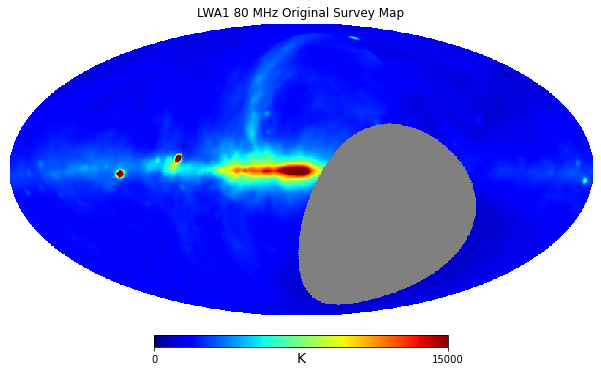

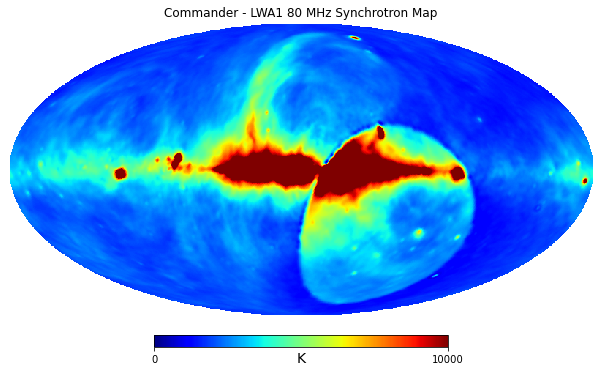

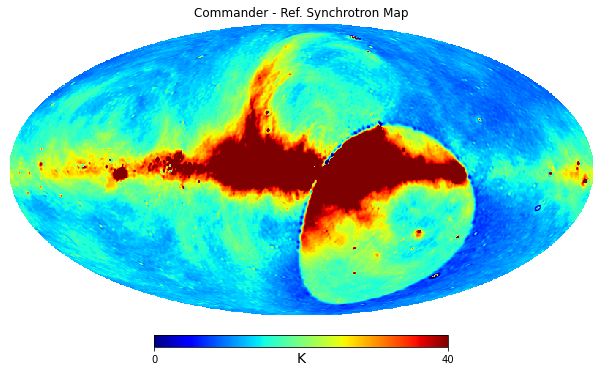

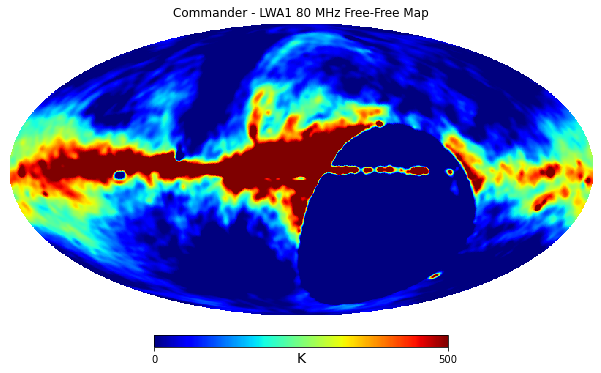

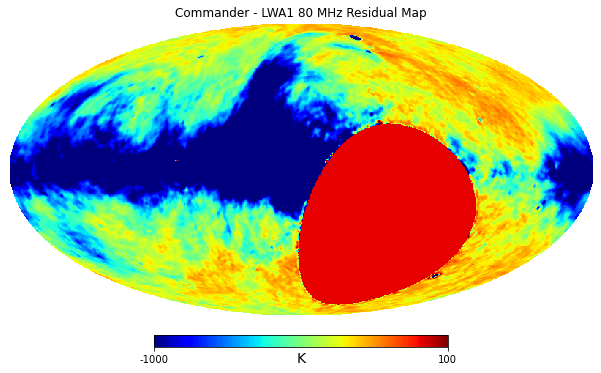

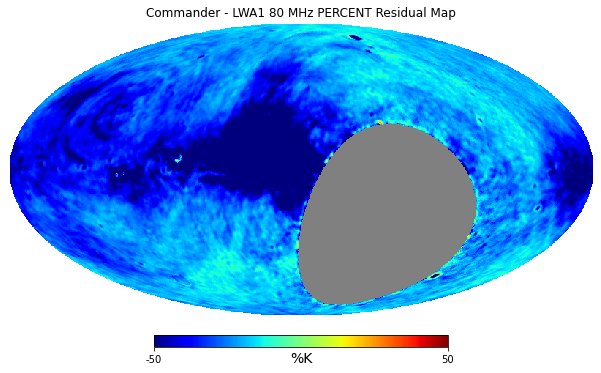

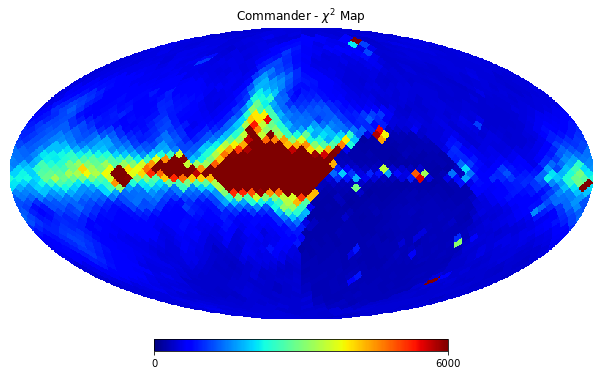

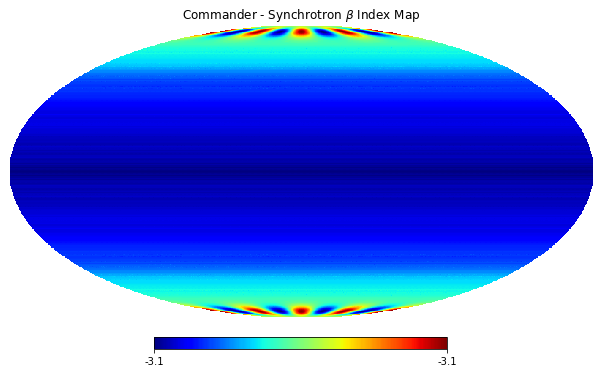

In [114]:
#
# Import lwa1-80 healpix map in galactic/celestial coords
#
lwa1_80mhz_map = hp.fitsfunc.read_map("commander_inputs/lwa1_80mhz_map.fits", dtype=None)
hp.mollview(lwa1_80mhz_map, title="LWA1 80 MHz Original Survey Map", min=0.0, max=15000.0, cmap='jet', unit='K')


# synch_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_synch_lwa180_old)
# res_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_res_lwa180_old)
# synch_comm_old = hp.fitsfunc.read_map(file_comm_synch_old)
# ff_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_ff_old)

synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_synch_lwa180)
res_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_res_lwa180)
synch_comm = hp.fitsfunc.read_map(file_comm_synch)
ff_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_ff)
chisq_comm = hp.fitsfunc.read_map(file_comm_chisq)
synch_beta_comm = hp.fitsfunc.read_map(file_comm_synch_beta)


comm_maps_dir_path = Path(f"../map-images/comm_{date}-"+run_str)
comm_maps_dir_path.mkdir(parents=True, exist_ok=True)

hp.mollview(synch_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=10000.0, cmap='jet', unit='K')
# hp.mollview(res_80MHz_LWA1_comm/1000, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', unit='kK')

plt.savefig(comm_maps_dir_path/'-synch_80lwa1-comm.png')

hp.mollview(synch_comm/(10**6), title="Commander - Ref. Synchrotron Map", min=0.0, max=40.0, cmap='jet', unit='K')
plt.savefig(comm_maps_dir_path/'-synch-comm.png')

hp.mollview(ff_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=500.0, cmap='jet', unit='K')
plt.savefig(comm_maps_dir_path/'-ff_80lwa1-comm.png')

hp.mollview(res_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-1000, max=100, unit='K')
plt.savefig(comm_maps_dir_path/'-res_80lwa1-comm.png')
#
# Create PERCENT-RESIDUAL map from the Comm resid map
#
percentres_lwa180 = res_80MHz_LWA1_comm/lwa1_80mhz_map * 100
hp.mollview(percentres_lwa180, title="Commander - LWA1 80 MHz PERCENT Residual Map", cmap='jet', min=-50, max=50, unit='%K')
plt.savefig(comm_maps_dir_path/'-resprcnt_80lwa1-comm.png')

hp.mollview(chisq_comm, title=r"Commander - $\chi^2$ Map", cmap='jet', min=0.0, max=6000)
plt.savefig(comm_maps_dir_path/'-chisq-comm.png')


hp.mollview(synch_beta_comm, title=r"Commander - Synchrotron $\beta$ Index Map", cmap='jet')
plt.savefig(comm_maps_dir_path/'-synch_beta-comm.png')
print(synch_beta_comm[0])


# hp.mollview(synch_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=15000.0, cmap='jet', unit='K')
# hp.mollview(res_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-5000, max=5000, unit='K')
# hp.mollview(synch_comm_old/(10**6), title="OLD Commander - Ref. Synchrotron Map", min=0.0, max=100.0, cmap='jet', unit='K')
# hp.mollview(ff_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=5000.0, cmap='jet', unit='K')

# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

In [115]:
# file_commander_lwa180 = "other-outputs/synch_35MHz-LWA1_c0001_k000001.fits"
# synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_commander_lwa180)

# hp.mollview(synch_80MHz_LWA1_comm, cmap='gist_heat')
# # hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# # hp.mollview(map_lwa180, coord=['C', 'G'])
# # hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

[-3.0410454 -3.0410454 -3.0410454 ... -3.0410454 -3.0410454 -3.0410454]


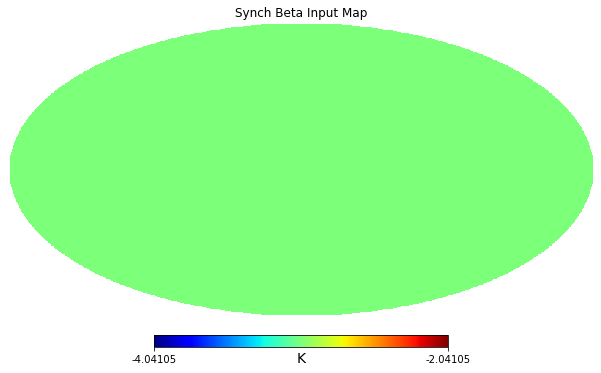

In [116]:
# Import commander default input synch beta map
synch_beta_input_file = "/mn/stornext/d16/cmbco/AST9240/2022/data/init_synch_beta_BP8.1_v1.fits"
synch_beta_input_map = hp.fitsfunc.read_map(synch_beta_input_file, dtype=None)
print(synch_beta_input_map)

#
# Display the map to check if it's okay
#
hp.mollview(synch_beta_input_map, title="Synch Beta Input Map", cmap='jet', unit='K')

## Plotting cool shit

In [117]:
fgindmean = np.genfromtxt(dir_comm+'fg_ind_mean_c0001.dat',
                            dtype=None,
                            usecols=np.arange(0,6),
                            names=True)
mpole_80lwa1 = np.genfromtxt(dir_comm+'fg_ind_mean_c0001.dat',
                            dtype=None,
                            usecols=np.arange(0,6),
                            names=True)
synchbetamean = fgindmean['synch_beta_I']
commiter = fgindmean['Sample']
fgindmean

array([(0, -3.354068, -3.266318, 7000., 1.8820252e+08, 61263.842 ),
       (1, -3.354068, -3.266318, 7000., 1.2704024e+08, 41354.244 ),
       (2, -3.100003, -3.06906 , 7000., 7.0437355e+06,  2292.8827)],
      dtype=[('Sample', '<i8'), ('synch_beta_I', '<f8'), ('synch_beta_QU', '<f8'), ('ff_Te_IQU', '<f8'), ('full_chisq', '<f8'), ('avg_chisq', '<f8')])

In [118]:
f = h5.File(dir_comm+'chain_c0001.h5', 'r')
type(f)


# names = []
mono_per_iter = []
def find_md(name, object):
    if 'md/80MHz-LWA1' in name:
        # names.append(name)
        print(object[()][0])
        mono_per_iter.append(object[()][0])
    return None
f.visititems(find_md)

# for i in range(3):
#     iter_synch_beta = f.visititems(find_foo)
#     print(iter_synch_beta)
# # print(f['iter_synch_beta'])

# print(beta_values[0])
mono_per_iter = np.array(mono_per_iter)
mono_per_iter.shape

2214.0
0.0005982795804721506
-0.00013333439744527445


(3,)

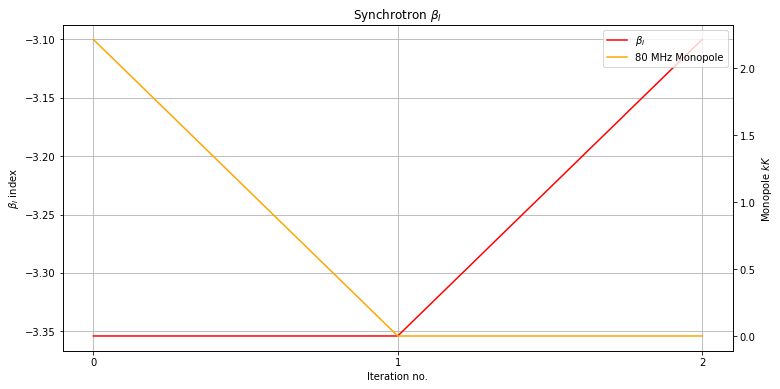

In [123]:
fig, ax = plt.subplots(figsize=(12, 6))
ax1 = ax.twinx()

ax.set_title(r'Synchrotron $\beta_I$')
ln = ax.plot(fgindmean['Sample'], fgindmean['synch_beta_I'], label=r'$\beta_I$', color='red')
ax.set_xlabel('Iteration no.')
ax.set_ylabel(r'$\beta_I$ index')
ln1 = ax1.plot(fgindmean['Sample'], mono_per_iter/1000.0, label=r'80 MHz Monopole', color='orange')
ax1.set_ylabel(r'Monopole $kK$')
# ax.legend()
# ax1.legend()
ax.grid()
# Solution for having two legends
leg = ln + ln1
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)

# #...
# ax = plt.figure().gca()
# #...
# ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.show()

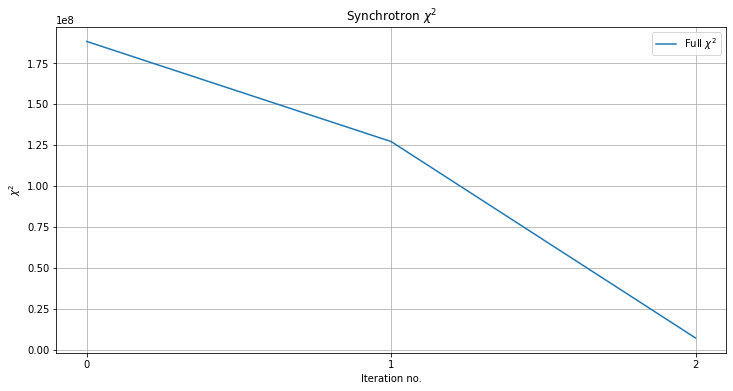

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(r'Synchrotron $\chi^2$')
ax.plot(fgindmean['Sample'], fgindmean['full_chisq'], label=r'Full $\chi^2$')
# ax.plot(fgindmean['Sample'], fgindmean['avg_chisq'], label=r'Avg $\chi^2$')
ax.set_xlabel('Iteration no.')
ax.set_ylabel(r'$\chi^2$')
ax.grid()
ax.legend()

# #...
# ax = plt.figure().gca()
# #...
# ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.show()